In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LEVEL 1

    Task-1

In [6]:
df = pd.read_csv("C:/Users/yasir/Downloads/Dataset.csv")

In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [22]:
# Handle missing values by filling them with "Unknown" in the "Cuisines" column
df["Cuisines"].fillna("Unknown", inplace=True)

In [28]:
# Verify if missing values are handled
missing_values_after = df.isnull().sum()
missing_values_after


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [30]:
# Analyze the distribution of the target variable
rating_distribution = df["Aggregate rating"].value_counts().sort_index()
rating_distribution

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\71300051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette="viridis")


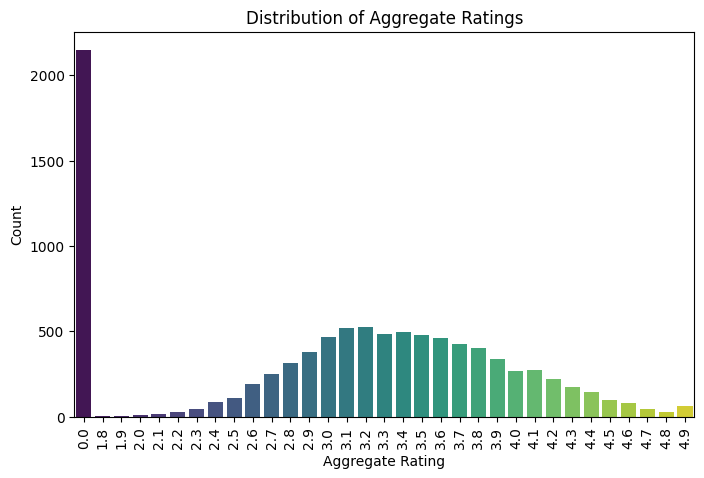

In [32]:
# Plot the distribution of the "Aggregate rating" column

plt.figure(figsize=(8,5))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette="viridis")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Ratings")
plt.xticks(rotation=90)
plt.show()

### LEVEL 1

       Task 2

In [40]:
# Basic statistical measures for numerical columns
numerical_stats = df.describe()
numerical_stats


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [42]:
# Explore distribution of categorical variables

country_distribution = df["Country Code"].value_counts()
city_distribution = df["City"].value_counts()
cuisine_distribution = df["Cuisines"].value_counts()
country_distribution, city_distribution, cuisine_distribution

(Country Code
 1      8652
 216     434
 215      80
 30       60
 214      60
 189      60
 148      40
 208      34
 14       24
 162      22
 94       21
 184      20
 166      20
 191      20
 37        4
 Name: count, dtype: int64,
 City
 New Delhi           5473
 Gurgaon             1118
 Noida               1080
 Faridabad            251
 Ghaziabad             25
                     ... 
 Panchkula              1
 Mc Millan              1
 Mayfield               1
 Macedon                1
 Vineland Station       1
 Name: count, Length: 141, dtype: int64,
 Cuisines
 North Indian                                             936
 North Indian, Chinese                                    511
 Chinese                                                  354
 Fast Food                                                354
 North Indian, Mughlai                                    334
                                                         ... 
 Bengali, Fast Food                             

In [46]:
# Identify top cuisines and cities with the highest number of restaurants
top_cuisines = cuisine_distribution.head(10)
top_cities = city_distribution.head(10)

top_cuisines, top_cities

(Cuisines
 North Indian                      936
 North Indian, Chinese             511
 Chinese                           354
 Fast Food                         354
 North Indian, Mughlai             334
 Cafe                              299
 Bakery                            218
 North Indian, Mughlai, Chinese    197
 Bakery, Desserts                  170
 Street Food                       149
 Name: count, dtype: int64,
 City
 New Delhi       5473
 Gurgaon         1118
 Noida           1080
 Faridabad        251
 Ghaziabad         25
 Bhubaneshwar      21
 Amritsar          21
 Ahmedabad         21
 Lucknow           21
 Guwahati          21
 Name: count, dtype: int64)

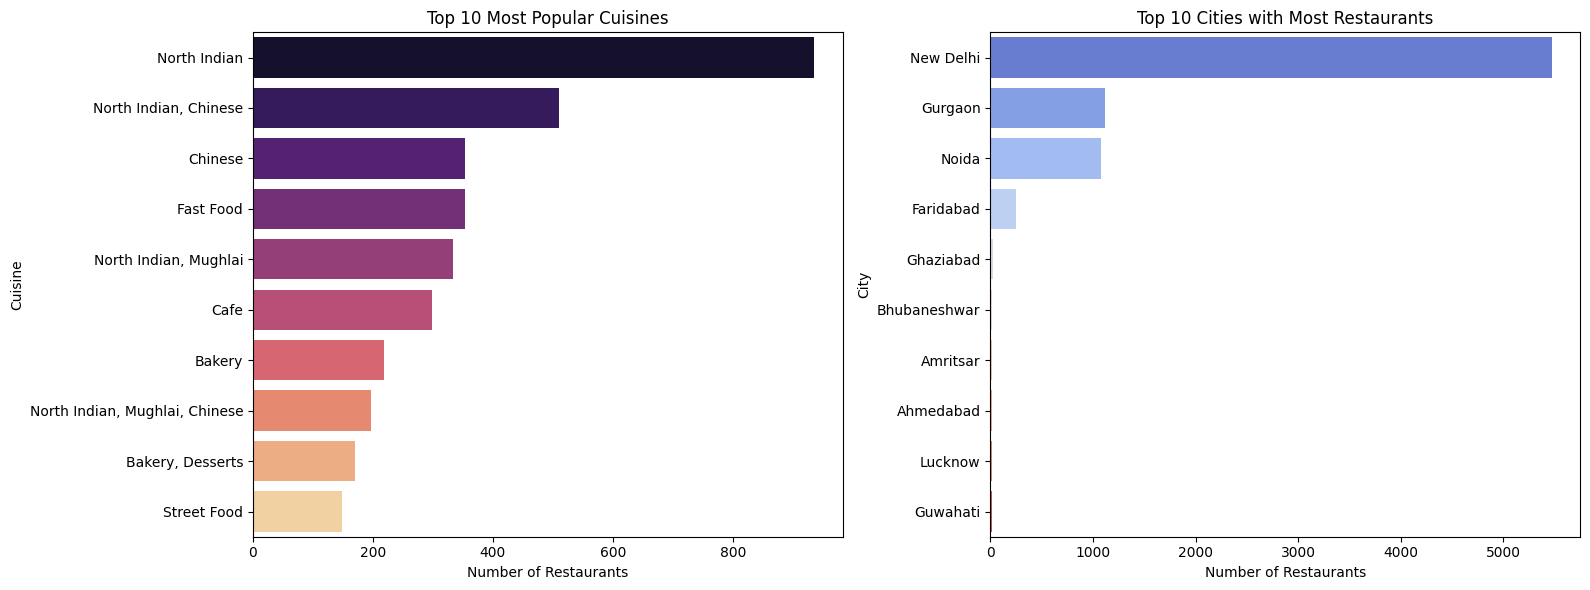

In [54]:
# Visualization for top cuisines and cities with most restaurants
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Cuisines
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, ax=axes[0], hue=top_cuisines.index, palette="magma", legend=False)
axes[0].set_title("Top 10 Most Popular Cuisines")
axes[0].set_xlabel("Number of Restaurants")
axes[0].set_ylabel("Cuisine")

# Top 10 Cities
sns.barplot(x=top_cities.values, y=top_cities.index, ax=axes[1], hue=top_cities.index, palette="coolwarm", legend=False)
axes[1].set_title("Top 10 Cities with Most Restaurants")
axes[1].set_xlabel("Number of Restaurants")
axes[1].set_ylabel("City")

plt.tight_layout()
plt.show()


### LEVEL 1

     Task 3

In [57]:
# Check if latitude and longitude columns exist in the dataset

lat_long_columns = [col for col in df.columns if "latitude" in col.lower() or "longitude" in col.lower()]
lat_long_columns


['Longitude', 'Latitude']

In [61]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable


In [77]:
from folium.plugins import MarkerCluster

# Create a base map
map_center = [df["Latitude"].median(), df["Longitude"].median()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

# Create a cluster
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Add markers to the cluster
for index, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Name: {row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(marker_cluster)

# Save and display the map
restaurant_map.save("restaurant__map.html")
print("Clustered map is ready! Open 'restaurant__map.html' to view it.")


Clustered map is ready! Open 'restaurant__map.html' to view it.


### LEVEL 2

      Task 1
    

In [80]:
# Calculate the percentage of restaurants that offer table booking and online delivery
table_booking_percentage = df["Has Table booking"].value_counts(normalize=True) * 100
online_delivery_percentage = df["Has Online delivery"].value_counts(normalize=True) * 100

# Compare average ratings of restaurants with and without table booking
avg_rating_table_booking = df.groupby("Has Table booking")["Aggregate rating"].mean()

# Analyze online delivery availability across different price ranges
online_delivery_by_price = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True) * 100

table_booking_percentage, online_delivery_percentage, avg_rating_table_booking, online_delivery_by_price


(Has Table booking
 No     87.875615
 Yes    12.124385
 Name: proportion, dtype: float64,
 Has Online delivery
 No     74.337766
 Yes    25.662234
 Name: proportion, dtype: float64,
 Has Table booking
 No     2.559359
 Yes    3.441969
 Name: Aggregate rating, dtype: float64,
 Price range  Has Online delivery
 1            No                     84.225923
              Yes                    15.774077
 2            No                     58.689367
              Yes                    41.310633
 3            No                     70.809659
              Yes                    29.190341
 4            No                     90.955631
              Yes                     9.044369
 Name: proportion, dtype: float64)

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\1349141642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\1349141642.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


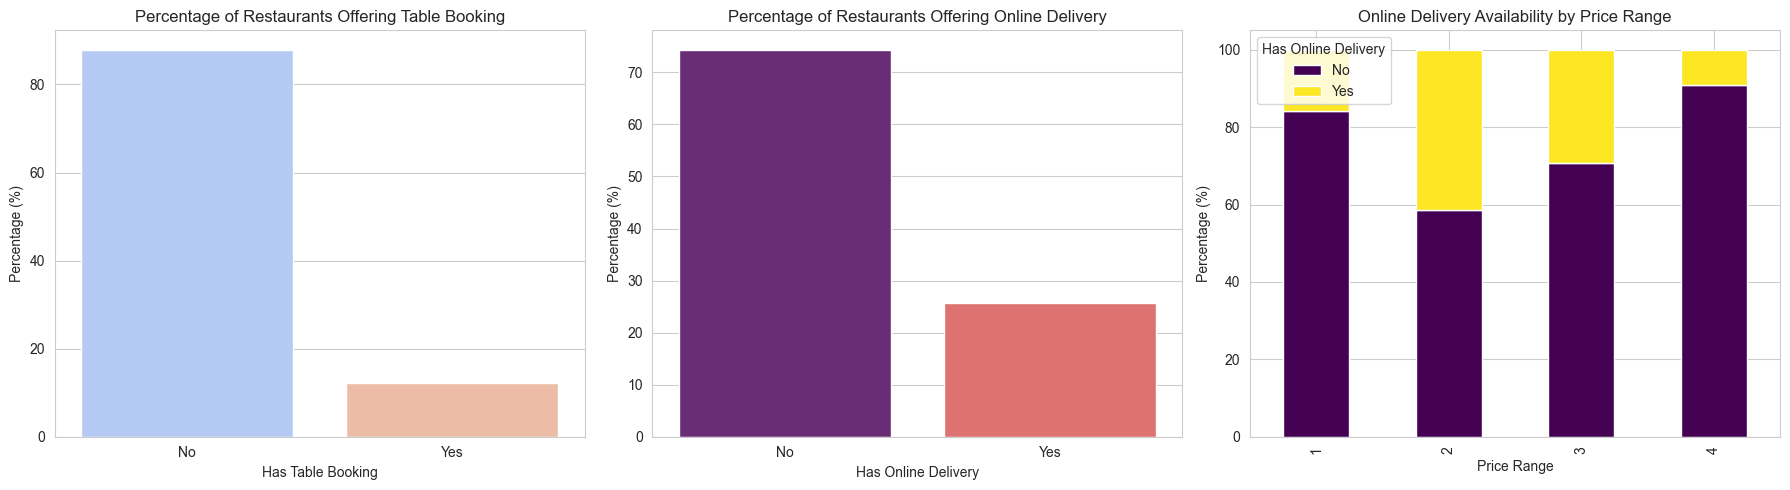

In [82]:
# Set the style
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot for Table Booking Availability
sns.barplot(
    x=table_booking_percentage.index,
    y=table_booking_percentage.values,
    ax=axes[0],
    palette="coolwarm"
)
axes[0].set_title("Percentage of Restaurants Offering Table Booking")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("Has Table Booking")

# Bar plot for Online Delivery Availability
sns.barplot(
    x=online_delivery_percentage.index,
    y=online_delivery_percentage.values,
    ax=axes[1],
    palette="magma"
)
axes[1].set_title("Percentage of Restaurants Offering Online Delivery")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xlabel("Has Online Delivery")

# Bar plot for Online Delivery by Price Range
online_delivery_by_price.unstack().plot(kind="bar", stacked=True, colormap="viridis", ax=axes[2])
axes[2].set_title("Online Delivery Availability by Price Range")
axes[2].set_ylabel("Percentage (%)")
axes[2].set_xlabel("Price Range")
axes[2].legend(title="Has Online Delivery")

# Adjust layout
plt.tight_layout()
plt.show()


### LEVEL 2

    Task 2

In [84]:
# Determine the most common price range
most_common_price_range = df["Price range"].value_counts().idxmax()

# Calculate the average rating for each price range
avg_rating_by_price = df.groupby("Price range")["Aggregate rating"].mean()

# Identify the color representing the highest average rating
highest_rating_price_range = avg_rating_by_price.idxmax()
highest_rating = avg_rating_by_price.max()

# Define a color mapping for visualization
colors = {1: "blue", 2: "green", 3: "orange", 4: "red"}
highest_rating_color = colors[highest_rating_price_range]

most_common_price_range, avg_rating_by_price, highest_rating_price_range, highest_rating_color


(1,
 Price range
 1    1.999887
 2    2.941054
 3    3.683381
 4    3.817918
 Name: Aggregate rating, dtype: float64,
 4,
 'red')

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\837212535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


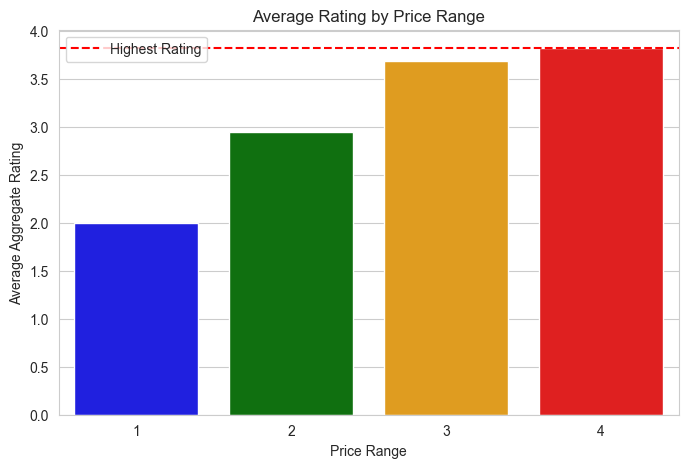

In [86]:
# Create a bar plot for average rating by price range
plt.figure(figsize=(8, 5))
sns.barplot(
    x=avg_rating_by_price.index,
    y=avg_rating_by_price.values,
    palette=colors.values()
)

# Add labels and title
plt.xlabel("Price Range")
plt.ylabel("Average Aggregate Rating")
plt.title("Average Rating by Price Range")

# Highlight the highest-rated price range
plt.axhline(highest_rating, color="red", linestyle="--", label="Highest Rating")

# Add legend
plt.legend()

# Show plot
plt.show()


### LEVEL 2

      Task 3

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [94]:
# Convert non-string values to empty strings before applying the length function
df["Restaurant Name"] = df["Restaurant Name"].astype(str)
df["Address"] = df["Address"].astype(str)

# Extract additional features
df["Restaurant Name Length"] = df["Restaurant Name"].apply(len)  # Length of restaurant name
df["Address Length"] = df["Address"].apply(len)  # Length of address

# Encoding categorical variables safely (Binary Encoding)
df["Has Table Booking (Binary)"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Has Online Delivery (Binary)"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})

# Display the first few rows to verify the changes
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking (Binary),Has Online Delivery (Binary)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


### LEVEL 3

     Task 1

In [97]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Selecting relevant features and target variable
features = [
    "Has Table Booking (Binary)",
    "Has Online Delivery (Binary)",
    "Restaurant Name Length",
    "Address Length",
    "Price range",
]
target = "Aggregate rating"

# Drop rows with missing values in the target column
df = df.dropna(subset=[target])

# Split data into train and test sets (80% train, 20% test)
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (not required for tree-based models but useful for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Use scaled data for Linear Regression, raw data for tree-based models
    if model_name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results[model_name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}

# Convert results into a DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display the model performance results
results_df


,R2 Score,MAE,RMSE
Linear Regression,0.234477,1.093477,1.320005
Decision Tree,-0.224355,1.220635,1.669361
Random Forest,0.042307,1.118394,1.476419


### LEVEL 3 

      Task 2

In [100]:
# Analyze the relationship between cuisine type and restaurant rating

# Splitting multiple cuisines and expanding into multiple rows for accurate analysis
df_exploded = df.assign(Cuisines=df["Cuisines"].str.split(", ")).explode("Cuisines")

# Calculate the average rating for each cuisine
cuisine_avg_rating = df_exploded.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

# Find the most popular cuisines based on the number of votes
cuisine_popularity = df_exploded.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)

# Identify cuisines that tend to receive higher ratings (Above average rating)
cuisines_high_ratings = cuisine_avg_rating[cuisine_avg_rating > df["Aggregate rating"].mean()]

# Display results
cuisine_avg_rating.head(10), cuisine_popularity.head(10), cuisines_high_ratings.head(10)


(Cuisines
 Sunda         4.900000
 B�_rek        4.700000
 Taiwanese     4.650000
 Ramen         4.500000
 Dim Sum       4.466667
 Hawaiian      4.412500
 D�_ner        4.400000
 Bubble Tea    4.400000
 Curry         4.400000
 Kebab         4.380000
 Name: Aggregate rating, dtype: float64,
 Cuisines
 North Indian    595981
 Chinese         364351
 Italian         329265
 Continental     288255
 Fast Food       184058
 American        183117
 Cafe            177568
 Mughlai         151946
 Desserts        105889
 Asian           104303
 Name: Votes, dtype: int64,
 Cuisines
 Sunda         4.900000
 B�_rek        4.700000
 Taiwanese     4.650000
 Ramen         4.500000
 Dim Sum       4.466667
 Hawaiian      4.412500
 D�_ner        4.400000
 Bubble Tea    4.400000
 Curry         4.400000
 Kebab         4.380000
 Name: Aggregate rating, dtype: float64)

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\1844142821.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_by_rating.values, y=top_cuisines_by_rating.index, palette="viridis")
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


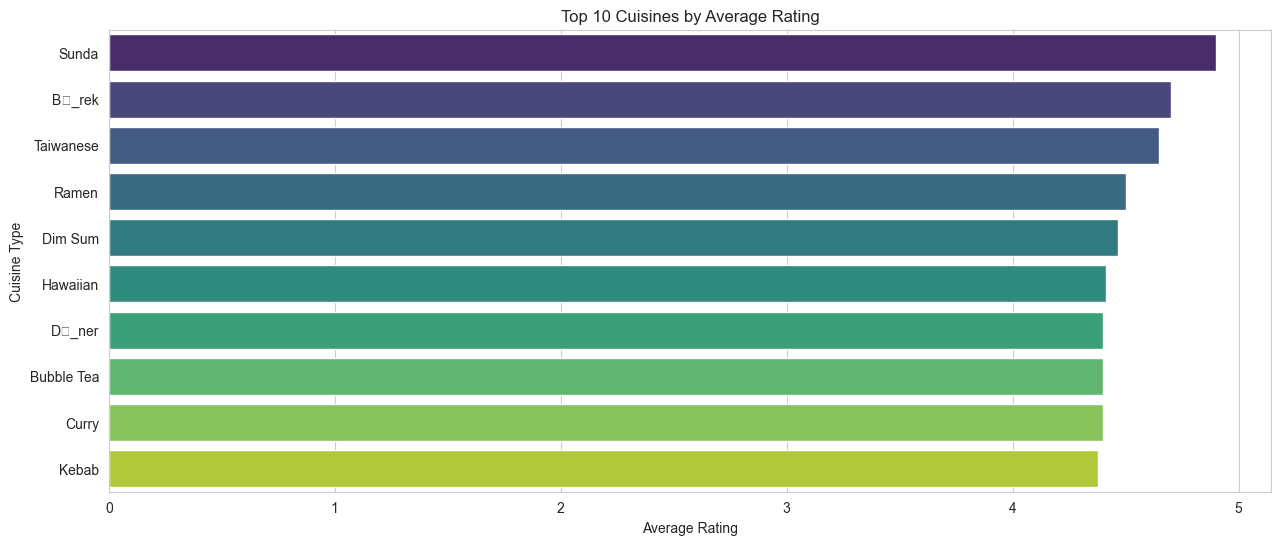

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\1844142821.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_by_votes.values, y=top_cuisines_by_votes.index, palette="magma")


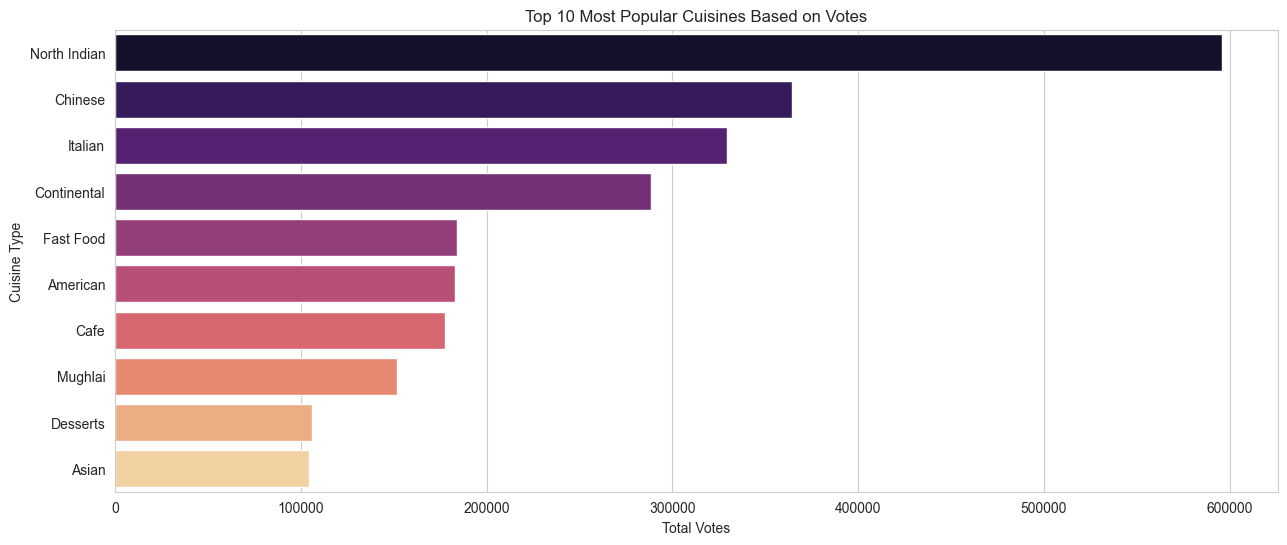

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\1844142821.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_rated_cuisines.values, y=top_high_rated_cuisines.index, palette="coolwarm", edgecolor="black")
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


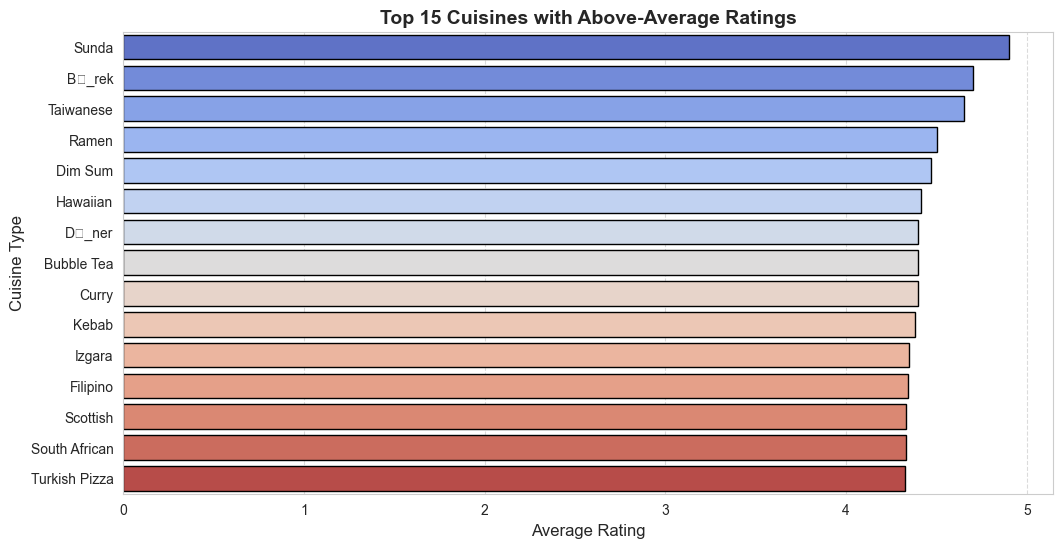

In [104]:
# Recalculating cuisine-based statistics

# Splitting multiple cuisines and expanding into multiple rows for accurate analysis
df_exploded = df.assign(Cuisines=df["Cuisines"].str.split(", ")).explode("Cuisines")

# Calculate the average rating for each cuisine
cuisine_avg_rating = df_exploded.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

# Find the most popular cuisines based on the number of votes
cuisine_popularity = df_exploded.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)

# Identify cuisines that tend to receive higher ratings (Above average rating)
cuisines_high_ratings = cuisine_avg_rating[cuisine_avg_rating > df["Aggregate rating"].mean()]

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visualization
plt.figure(figsize=(15, 6))

# Top 10 cuisines with highest average rating
top_cuisines_by_rating = cuisine_avg_rating.head(10)
sns.barplot(x=top_cuisines_by_rating.values, y=top_cuisines_by_rating.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

# Top 10 most popular cuisines based on votes
top_cuisines_by_votes = cuisine_popularity.head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_cuisines_by_votes.values, y=top_cuisines_by_votes.index, palette="magma")
plt.xlabel("Total Votes")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Most Popular Cuisines Based on Votes")
plt.show()

# Improved visualization for cuisines with above-average ratings
# Selecting only the top 15 cuisines for better readability
top_high_rated_cuisines = cuisines_high_ratings.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_high_rated_cuisines.values, y=top_high_rated_cuisines.index, palette="coolwarm", edgecolor="black")

# Labels and title
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Cuisine Type", fontsize=12)
plt.title("Top 15 Cuisines with Above-Average Ratings", fontsize=14, fontweight="bold")

# Enhancing readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()



### LEVEL 3

      Task 3

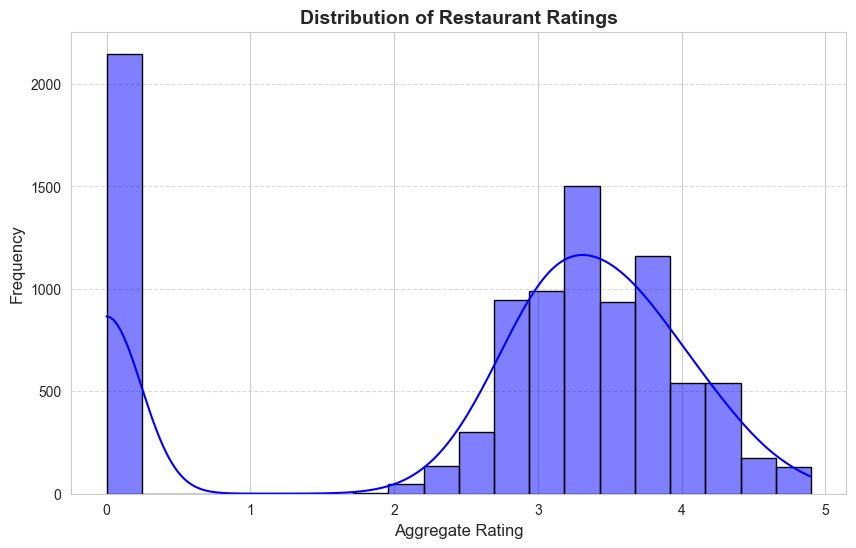

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\2269876427.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_by_rating.values, y=top_cuisines_by_rating.index, palette="plasma", edgecolor="black")
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


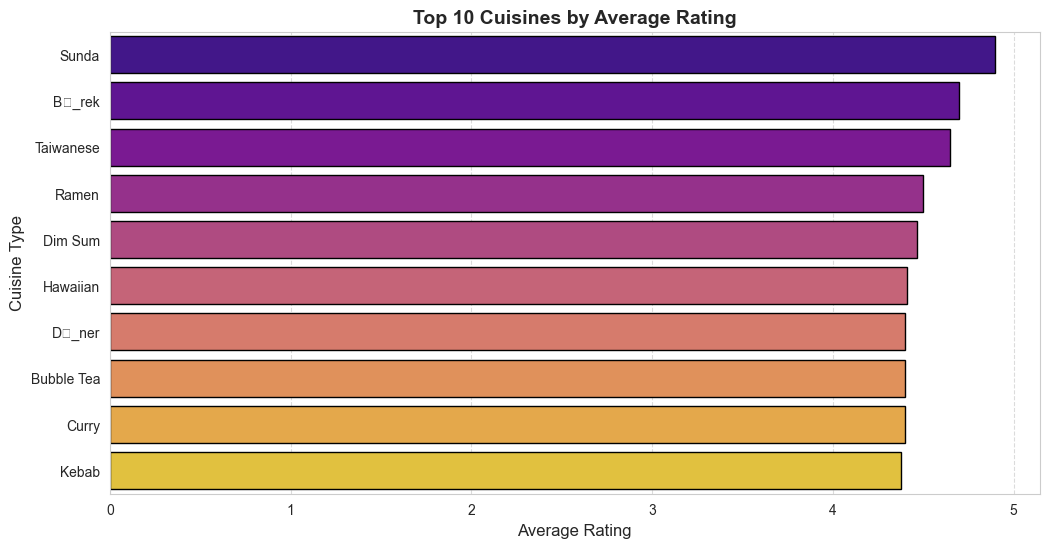

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\2269876427.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_rating.values, y=city_avg_rating.index, palette="viridis", edgecolor="black")


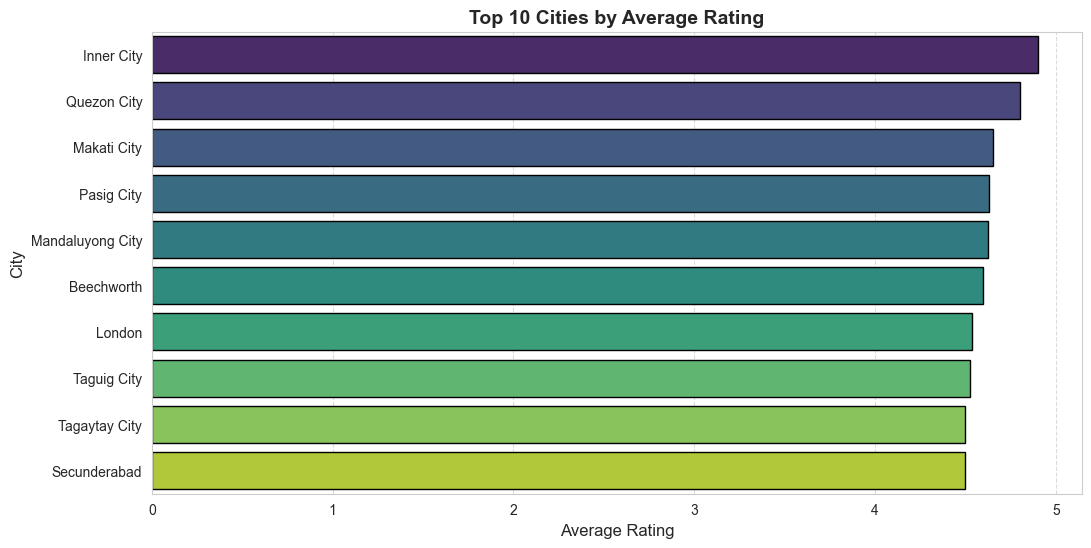

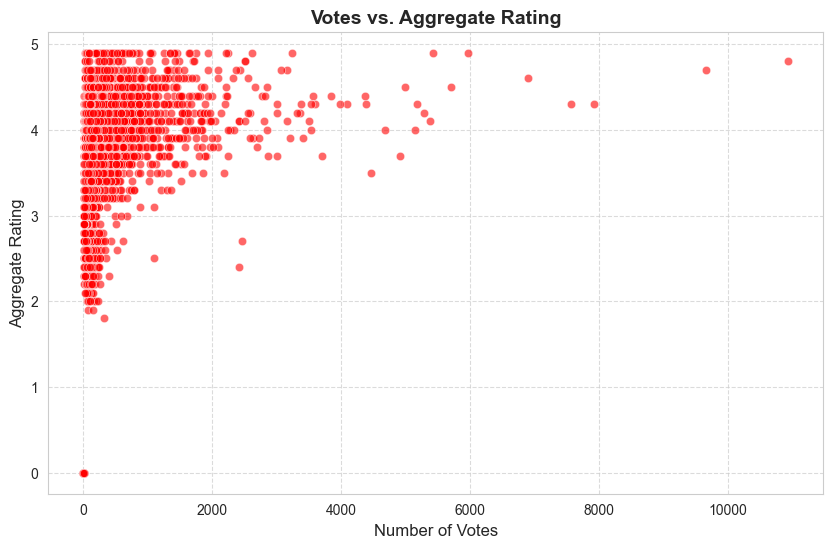

C:\Users\yasir\AppData\Local\Temp\ipykernel_2988\2269876427.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Price range"], y=df["Aggregate rating"], palette="coolwarm")


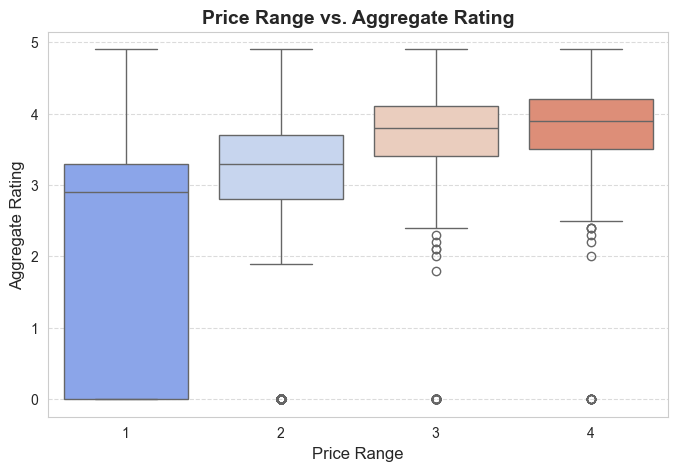

In [107]:
# Data Visualization

# 1. Distribution of Ratings using a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="blue", edgecolor="black")
plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Restaurant Ratings", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 2. Compare the average ratings of different cuisines (Top 10 cuisines by rating)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines_by_rating.values, y=top_cuisines_by_rating.index, palette="plasma", edgecolor="black")
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Cuisine Type", fontsize=12)
plt.title("Top 10 Cuisines by Average Rating", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 3. Compare the average ratings of different cities (Top 10 cities by rating)
city_avg_rating = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_avg_rating.values, y=city_avg_rating.index, palette="viridis", edgecolor="black")
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.title("Top 10 Cities by Average Rating", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 4. Relationship between Number of Votes and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"], alpha=0.6, color="red")
plt.xlabel("Number of Votes", fontsize=12)
plt.ylabel("Aggregate Rating", fontsize=12)
plt.title("Votes vs. Aggregate Rating", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 5. Relationship between Price Range and Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Price range"], y=df["Aggregate rating"], palette="coolwarm")
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Aggregate Rating", fontsize=12)
plt.title("Price Range vs. Aggregate Rating", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
